# 基本使用

In [1]:
# 导入cclib 包
import cclib

In [2]:
logFile = "waterH.log"

# 读取log文件
data = cclib.io.ccread(logFile)

In [43]:
# 能量,cclib的能量单位是ev，转换为kcal/mol
# 电子伏特转成卡路里
energy = data.scfenergies[-1] / 96.4869	
print("能量：", energy)

能量： -49.88029898085426


In [39]:
4812/172

27.976744186046513

In [34]:
# 获取频率
freq = data.vibfreqs

# 检查频率中是否有负数，如果有输出为有虚频
if any(freq < 0):
    print("有虚频")
else:
    print("无虚频")

# 定义上面的函数
def check_imaginary_freq(logFile):
    data = cclib.io.ccread(logFile)
    freq = data.vibfreqs
    if any(freq < 0):
        print("有虚频")
    else:
        print("无虚频")

# 测试函数
check_imaginary_freq(logFile)

无虚频
无虚频


In [8]:
# 查看是否收敛
print(data.optdone)

True


In [5]:
# 获取能量
data.scfenergies

array([-4812.61559599, -4812.73441415, -4812.74637965, -4812.75470987,
       -4812.76381374, -4812.7766549 , -4812.78710641, -4812.79276292,
       -4812.7944819 , -4812.79490781, -4812.79507668, -4812.79516087,
       -4812.79522373, -4812.79529508, -4812.79536912, -4812.79541974,
       -4812.79541974])

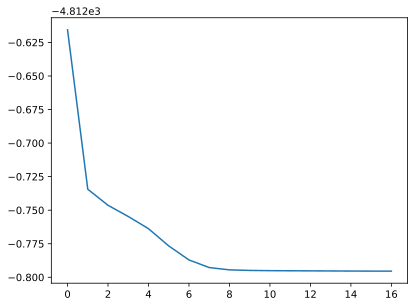

In [7]:
# 能量进行绘图
import matplotlib.pyplot as plt
# 高清绘图设置
%config InlineBackend.figure_format = 'svg'

# 绘图
plt.plot(data.scfenergies)
plt.show()


In [14]:
'''
创建函数：
1.查看是否收敛
2.获取能量，
    如果没有收敛，返回"没有收敛"，
    如果收敛了，能量进行绘图，在图中显示最后能量
'''
def getEnergy(logFile):
    data = cclib.io.ccread(logFile)
    if data.optdone:
        plt.plot(data.scfenergies)
        # 在图中显示最后的收敛的能量
        plt.text(len(data.scfenergies)-1, data.scfenergies[-1], str(data.scfenergies[-1]))
        plt.show()
    else:
        print("没有收敛")

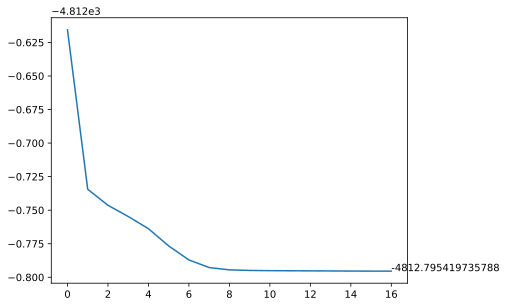

In [15]:
# 测试函数
getEnergy("waterH.log")

In [16]:
import cclib
import matplotlib.pyplot as plt

def read_data(logFile):
    """读取数据"""
    try:
        data = cclib.io.ccread(logFile)
    except Exception as e:
        print(f"读取文件时出错: {e}")
        return None
    return data

def check_convergence(data):
    """检查是否收敛"""
    return data.optdone if data else None

def plot_energies(data):
    """如果收敛，绘制能量图"""
    if data:
        plt.plot(data.scfenergies)
        # 在图中显示最后的收敛的能量
        plt.text(len(data.scfenergies)-1, data.scfenergies[-1], str(data.scfenergies[-1]))
        plt.show()

def getEnergy(logFile):
    """获取能量，如果没有收敛，返回"没有收敛"，如果收敛了，能量进行绘图，在图中显示最后能量"""
    data = read_data(logFile)
    if check_convergence(data):
        plot_energies(data)
    else:
        print("没有收敛")

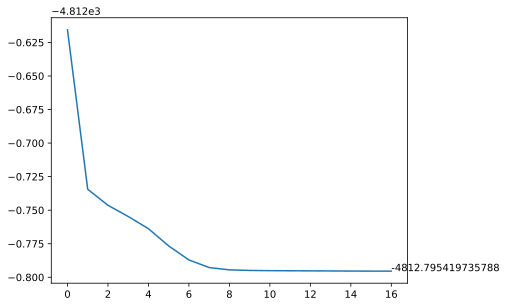

In [17]:
getEnergy("waterH.log")

# 计算能量差

In [55]:
import cclib


# 单位换算
ev2kj = 96.4869 # 电子伏特转成kj/mol
ev2cal = 23.0605 # 电子伏特转成cal/mol

# 反应物
logFile1 = "H2O.log"
logFile2 = "HF.log"

# 产物
logFile3 = "waterH.log"

def read_data(logFile):
    """读取数据"""
    try:
        data = cclib.io.ccread(logFile)
    except Exception as e:
        print(f"读取文件时出错: {e}")
        return None
    return data

def getEnergy(logFile):
    """获取能量，如果没有收敛，返回None"""
    data = read_data(logFile)
    if data and data.optdone:
        return data.scfenergies[-1]
    else:
        print(f"{logFile} 没有收敛")
        return None

# 计算反应能
energy1 = getEnergy(logFile1)
energy2 = getEnergy(logFile2)
energy3 = getEnergy(logFile3)

if energy1 is not None and energy2 is not None and energy3 is not None:
    deltaH = energy3 - energy1 - energy2
else:
    print("无法计算反应能，因为至少有一个文件没有收敛")


In [56]:

print(deltaH*ev2kj)

-49.95117721668363


# 测试

In [3]:
import cclib
import pandas as pd
from IPython.display import display

pd.set_option('display.unicode.east_asian_width', True)

# === 1.定义cclib分析类 ===
class LogFileAnalyzer:
    def __init__(self, log_file):
        self.log_file = log_file
        self.data = self.read_data()

    def read_data(self):
        """读取数据"""
        try:
            data = cclib.io.ccread(self.log_file)
            return data
        except Exception as e:
            print(f"读取文件时出错: {e}")
            return None

    def check_imaginary_freq(self):
        """检查虚频"""
        if self.data:
            freq = self.data.vibfreqs
            if any(freq < 0):
                print("有虚频")
            else:
                print("无虚频")

    def check_convergence(self):
        """检查是否收敛"""
        if self.data:
            return self.data.optdone
        return None

    def get_energy(self):
        """
        获取能量,能量单位是ev
        
        """
        # 如果没有收敛，返回None
        if self.data and self.check_convergence():
            return self.data.scfenergies[-1]
        print(f"{self.log_file} 没有收敛")
        return None

# === 2. 物质 === 

# 反应物
reactionFiles = ["H2O.log", "HF.log"]

# 产物
productFiles = ["waterH.log"]

# ev 转换为 kj/mol
ev2kj = 96.4869

all_files = reactionFiles + productFiles


def analyze_files(file_list):
    result = []
    for file in file_list:
        analyzer = LogFileAnalyzer(file)
        
        # 分析收敛性
        convergence = "是" if analyzer.check_convergence() else "否"
        
        # 分析虚频
        imaginary_freq = "有" if any(analyzer.data.vibfreqs < 0) else "无"
        
        # 获取能量
        energy = analyzer.get_energy() / ev2kj if analyzer.get_energy() else "未收敛"
        
        result.append([file, convergence, imaginary_freq, energy])

    return result

results = analyze_files(all_files)

/Users/wxhgk/Library/Python/3.9/lib/python/site-packages/cclib/parser/utils.py:182: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  r, _ = scipy.spatial.transform.Rotation.align_vectors(b_, a_)


In [14]:
# === 3. 创建表格 ===


# 美化表格
df = pd.DataFrame(results, columns=["文件", "收敛", "虚频", "能量(KJ/mol)"])
display(df)

,文件,收敛,虚频,能量(KJ/mol)
0,H2O.log,是,无,NaN
1,HF.log,是,无,NaN
2,waterH.log,是,无,NaN


In [27]:
import cclib
import pandas as pd

# 设置Pandas的显示选项，以便在显示东亚字符时更加整洁
pd.set_option('display.unicode.east_asian_width', True)

# === 1. 定义cclib分析类 ===
class LogFileAnalyzer:
    def __init__(self, log_file):
        self.log_file = log_file
        self.data = self.read_data()

    def read_data(self):
        """读取并解析化学日志文件数据"""
        try:
            data = cclib.io.ccread(self.log_file)
            return data
        except Exception as e:
            print(f"读取文件时出错: {e}")
            return None

    def check_imaginary_freq(self):
        """检查是否存在虚频"""
        if self.data:
            return any(freq < 0 for freq in self.data.vibfreqs)
        return False

    def check_convergence(self):
        """检查计算是否收敛"""
        if self.data:
            return self.data.optdone
        return False

    def get_energy(self):
        """获取能量，如果计算收敛则以eV为单位返回最后一个SCF能量"""
        if self.data and self.check_convergence():
            return self.data.scfenergies[-1]
        else:
            print(f"{self.log_file} 没有收敛")
            return None

# === 2. 分析文件 ===
def analyze_files(file_list):
    # 定义一个空的DataFrame
    results_df = pd.DataFrame(columns=['文件', '收敛', '虚频', '能量(eV)'])

    for file in file_list:
        analyzer = LogFileAnalyzer(file)
        
        # 分析收敛性和虚频
        convergence = analyzer.check_convergence()
        imaginary_freq = analyzer.check_imaginary_freq()
        
        # 获取能量，如果未收敛则设置为None
        energy = analyzer.get_energy() if convergence else None
        
        # 将结果添加到DataFrame中
        results_df = results_df.append({
            '文件': file,
            '收敛': "是" if convergence else "否",
            '虚频': "有" if imaginary_freq else "无",
            '能量(eV)': energy
        }, ignore_index=True)

    return results_df


# === 3. 添加能量差计算功能 ===
def 反应能量函数(reaction_files, product_files, ev_to_kj_per_mol):
    # 分析反应物和生成物的文件
    reaction_results = analyze_files(reaction_files)
    product_results = analyze_files(product_files)

    # 计算总能量
    total_reaction_energy = sum(reaction_results['能量(eV)'].astype(float))
    total_product_energy = sum(product_results['能量(eV)'].astype(float))

    # 计算能量差并转换为 kJ/mol
    energy_difference = (total_product_energy - total_reaction_energy) * ev_to_kj_per_mol
    return energy_difference


In [25]:
# === 4. 文件列表和常数定义 === 
反应物 = ["H2O.log", "HF.log"]
产物 = ["waterH.log"]
ev_to_kj_per_mol = 96.4869

所有物质 = reaction_files + product_files

# === 5. 分析所有文件并显示结果 ===
results = analyze_files(所有物质)
# 转换能量单位从eV到kJ/mol
results['能量（kJ/mol）'] = results['能量(eV)'].astype(float) / ev_to_kj_per_mol
print(results)

         文件 收敛 虚频     能量(eV)  能量（kJ/mol）
0     H2O.log   是   无 -2079.502495      -21.552174
1      HF.log   是   无 -2732.775225      -28.322759
2  waterH.log   是   无 -4812.795420      -49.880299


/var/folders/fj/_bs3j7655nz_dld8kpf6vctc0000gn/T/ipykernel_2558/2866687467.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/Users/wxhgk/Library/Python/3.9/lib/python/site-packages/cclib/parser/utils.py:182: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  r, _ = scipy.spatial.transform.Rotation.align_vectors(b_, a_)
/var/folders/fj/_bs3j7655nz_dld8kpf6vctc0000gn/T/ipykernel_2558/2866687467.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/fj/_bs3j7655nz_dld8kpf6vctc0000gn/T/ipykernel_2558/2866687467.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [18]:
-49.880299-(-21.552174 -28.322759)

-0.005366000000002202

In [28]:
energy_diff = 反应能量函数(反应物, 产物, ev_to_kj_per_mol)
print(f"能量差（kJ/mol）: {energy_diff}")

能量差（kJ/mol）: -49.951177216639756


/var/folders/fj/_bs3j7655nz_dld8kpf6vctc0000gn/T/ipykernel_2558/2728937010.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/Users/wxhgk/Library/Python/3.9/lib/python/site-packages/cclib/parser/utils.py:182: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  r, _ = scipy.spatial.transform.Rotation.align_vectors(b_, a_)
/var/folders/fj/_bs3j7655nz_dld8kpf6vctc0000gn/T/ipykernel_2558/2728937010.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/fj/_bs3j7655nz_dld8kpf6vctc0000gn/T/ipykernel_2558/2728937010.py:58: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
